In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from enum import Enum
import requests
import pandas as pd
import numpy as np
import datetime
import collections as col
import scipy as sp
import time

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
SYMBOL_STATUS = Enum('SYMBOL_STATUS', 'PRE_TRADING TRADING POST_TRADING END_OF_DAY HALT AUCTION_MATCH BREAK')
SYMBOL_TYPE = Enum('SYMBOL_TYPE', 'SPOT')
ORDER_STATUS = Enum('ORDER_STATUS', 'NEW PARTIALLY_FILLED FILLED CANCELED PENDING_CANCEL REJECTED EXPIRED')
ORDER_TYPES = Enum('ORDER_TYPES', 'LIMIT MARKET STOP_LOSS STOP_LOSS_LIMIT TAKE_PROFIT TAKE_PROFIT_LIMIT LIMIT_MAKER')
ORDER_SIDE = Enum('ORDER_SIDE', 'BUY SELL')
TIME_FORCE = Enum('TIME_FORCE', 'GTC IOK FOK')
CANDLE_INT = Enum('CANDLE_INT', '1m 3m 5m 15m 30m 1h 2h 4h 6h 8h 12h 1d 3d 1w 1M')
RATE_LIMIT = Enum('RATE_LIMIT', 'REQUESTS ORDERS')
RATE_LIMIT_INT = Enum('RATE_LIMIT_INT', 'SECOND MINUTE DAY')

In [5]:
BASE_ENDPOINT = 'https://api.binance.com'

# Public Endpoints
TEST_CONNECT = '/api/v1/ping'
SERVER_TIME = '/api/v1/time'

CANDLE = '/api/v1/klines'

In [6]:
def collectOLHCData(symbol):
    data = []
    counter = 1000
    endTime = int(time.time()*1000)
    df = pd.DataFrame(data=None, columns=['OPEN_TIME', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'CLOSE_TIME', 'QUOTE_VOL', 'NUM_TRADES', 'TAKE_BASE_VOL', 'TAKE_QUOTE_VOL', 'EXTRA'])
    while(counter > 0):
        counter -= 1
        response = requests.get(BASE_ENDPOINT+CANDLE+'?symbol='+symbol+'&interval=1m&endTime='+str(endTime))
        df = pd.DataFrame(
            data=np.array(response.json()), 
            columns=['OPEN_TIME', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'CLOSE_TIME', 'QUOTE_VOL', 'NUM_TRADES', 'TAKE_BASE_VOL', 'TAKE_QUOTE_VOL', 'EXTRA']
        )
        data.append(df)
        endTime = int(df.OPEN_TIME.min())-1
    return pd.concat(data, ignore_index=True).sort_values(by='OPEN_TIME')

In [7]:
symbol = 'ETHBTC'
df = collectOLHCData(symbol)

In [8]:
df.shape

(500000, 12)

In [9]:
# Post processing
df = df.replace(to_replace='\.', value='', regex=True).reset_index(drop=True)

df.OPEN  = df.OPEN.astype(int)
df.HIGH  = df.HIGH.astype(int)
df.LOW   = df.LOW.astype(int)
df.CLOSE = df.CLOSE.astype(int)
df.VOLUME = df.VOLUME.astype(int)
df.QUOTE_VOL = df.QUOTE_VOL.astype(int)
df.TAKE_BASE_VOL = df.TAKE_BASE_VOL.astype(int)
df.TAKE_QUOTE_VOL = df.TAKE_QUOTE_VOL.astype(int)

In [10]:
df.tail()

OPEN_TIME     OPEN     HIGH      LOW    CLOSE       VOLUME  \
499995  1547497260000  3488200  3490000  3486900  3489100  29136900000   
499996  1547497320000  3489100  3492000  3489000  3491400  26084100000   
499997  1547497380000  3491800  3493700  3489500  3492200  25921300000   
499998  1547497440000  3492300  3494000  3489500  3493400  11235300000   
499999  1547497500000  3492700  3493200  3490000  3491200  17637600000   

           CLOSE_TIME   QUOTE_VOL NUM_TRADES  TAKE_BASE_VOL  TAKE_QUOTE_VOL  \
499995  1547497319999  1016215767        138    17061900000       595105651   
499996  1547497379999   910667853         96     5750700000       200761733   
499997  1547497439999   905020869        155     4859300000       169668569   
499998  1547497499999   392268690        101     8208700000       286615712   
499999  1547497559999   615809095        146     8809900000       307640243   

       EXTRA  
499995     0  
499996     0  
499997     0  
499998     0  
499999     0

In [13]:
strt = df.iloc[1].OPEN_TIME
end = df.iloc[-1].OPEN_TIME

strt
end

u'1517302560000'

u'1547497500000'

In [14]:
df.to_csv('data/ETHBTC_'+strt+'_'+end+'.csv', index=False)

In [15]:
df.head()

OPEN_TIME      OPEN      HIGH       LOW     CLOSE       VOLUME  \
0  1517302500000  10601000  10615800  10592300  10600700  10836500000   
1  1517302560000  10600700  10614500  10596100  10606900  10733100000   
2  1517302620000  10596800  10606900  10595100  10606600   6117500000   
3  1517302680000  10606300  10609600  10596000  10608300  10715300000   
4  1517302740000  10609600  10609600  10592800  10593000   7015000000   

      CLOSE_TIME   QUOTE_VOL NUM_TRADES  TAKE_BASE_VOL  TAKE_QUOTE_VOL EXTRA  
0  1517302559999  1149031803        248     5793600000       614644057     0  
1  1517302619999  1137792807        235     1568800000       166429960     0  
2  1517302679999   648532102        177     3110800000       329891123     0  
3  1517302739999  1136442266        213     5774100000       612565957     0  
4  1517302799999   743839327        205     3905100000       414188468     0

In [16]:
df.OPEN = df.OPEN.astype(float)
df.CLOSE = df.CLOSE.astype(float)
df.HIGH = df.HIGH.astype(float)
df.LOW = df.LOW.astype(float)

df.VOLUME = df.VOLUME.astype(float)
df.QUOTE_VOL = df.QUOTE_VOL.astype(float)
df.TAKE_BASE_VOL = df.TAKE_BASE_VOL.astype(float)
df.TAKE_QUOTE_VOL = df.TAKE_QUOTE_VOL.astype(float)

In [17]:
df.OPEN_TIME = df.OPEN_TIME.astype(int)
df.OPEN_TIME = df.OPEN_TIME/1000
df.OPEN_TIME = df.OPEN_TIME.apply(datetime.datetime.fromtimestamp)
df.CLOSE_TIME = df.CLOSE_TIME.astype(int)
df.CLOSE_TIME = df.CLOSE_TIME/1000
df.CLOSE_TIME = df.CLOSE_TIME.apply(datetime.datetime.fromtimestamp)

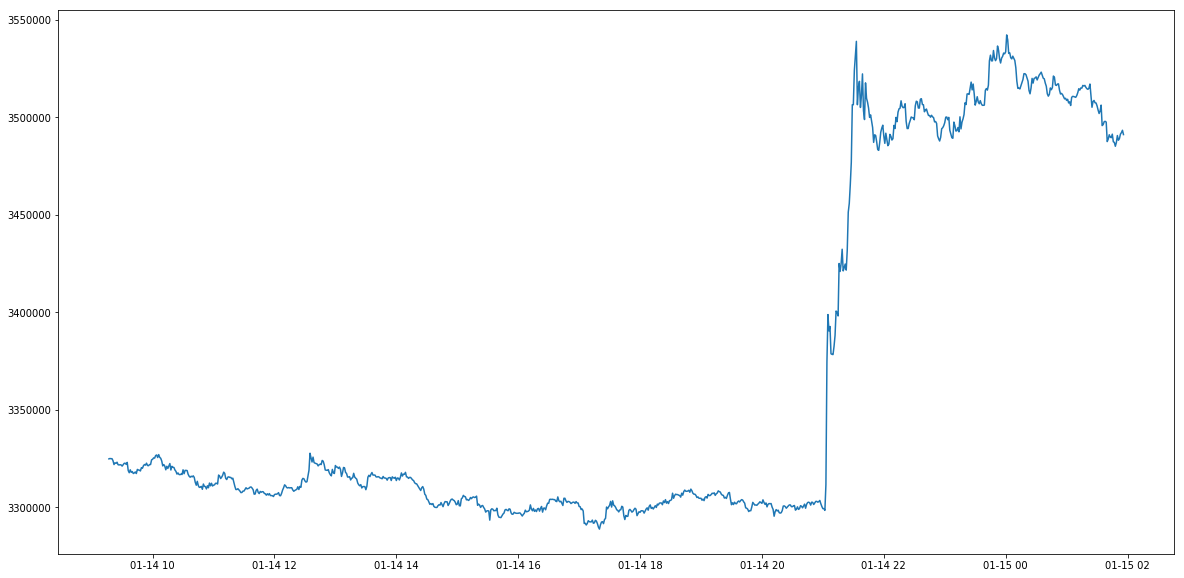

In [18]:
plt.figure(figsize=(20, 10))
plt.plot(df.CLOSE_TIME[-1000:], df.CLOSE.astype(float)[-1000:])
plt.show()

In [110]:
p_diff = (df.CLOSE.astype(float).values[1:] - df.CLOSE.astype(float).values[:-1])/df.CLOSE.astype(float).values[:-1]

(array([  4.49761000e+05,   1.39000000e+02,   4.90000000e+01,
          1.90000000e+01,   1.10000000e+01,   6.00000000e+00,
          7.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          2.00000000e+00]),
 array([ 0.        ,  0.02755519,  0.05511039,  0.08266558,  0.11022078,
         0.13777597,  0.16533117,  0.19288636,  0.22044156,  0.24799675,
         0.27555195]),
 <a list of 10 Patch objects>)

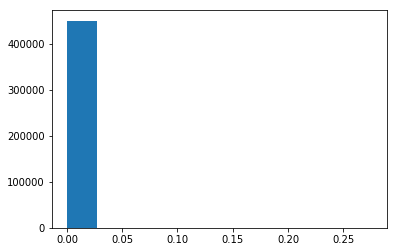

In [112]:
plt.hist(np.abs(p_diff))

In [118]:
(np.abs(p_diff) > 0.005).sum()

7761

In [114]:
p_diff.shape

(449999,)

In [218]:
# Creating Dataset
np.random.seed(0)

data = df.CLOSE.astype(float).values
diff_data = (data[1:] - data[:-1])/data[:-1]
bd_diff_data = np.zeros(diff_data.shape)
bd_diff_data[diff_data > 0.005] = 1
bd_diff_data[diff_data < -0.005] = -1

X_window_size = 120
Y_window_size = 1
X = np.zeros((len(data) - X_window_size - Y_window_size, X_window_size))
Y = np.zeros((len(data) - X_window_size - Y_window_size, Y_window_size))
W = np.zeros((len(data) - X_window_size - Y_window_size, Y_window_size))

for i in range(X.shape[0]):
    X[i] = data[i:i+X_window_size]
    Y[i] = bd_diff_data[i+X_window_size:i+X_window_size+Y_window_size]
    W[i] = diff_data[i+X_window_size:i+X_window_size+Y_window_size]

# sample_zero = list(np.random.choice(np.where(Y == 0)[0], 10000))
sample_pos = list(np.where(Y == 1)[0])
sample_neg = list(np.where(Y == -1)[0])
# sample = sample_zero + sample_pos + sample_neg
sample = sample_pos + sample_neg
sample = sorted(sample)
X = X[sample]
Y = np.ravel(Y[sample])
W = np.ravel(W[sample])

cv_fold_size = 2000
cv_folds = np.random.randint(X.shape[0]-cv_fold_size, size=(10,))

In [205]:
def abs_weigh(data):
    return(len(data)*np.abs(data)/np.abs(data).sum())
def minmax_weigh(data):
    from sklearn.preprocessing import MinMaxScaler
    return(np.abs(MinMaxScaler(feature_range=(-1, 1)).fit_transform(data)))

In [212]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

acc = []
for cv_fold in cv_folds:
    model = RandomForestClassifier(n_estimators=100, criterion='gini', n_jobs=-1, max_features=None, random_state=0)
    model = model.fit(X[:cv_fold], Y[:cv_fold], sample_weight=abs_weigh(W[:cv_fold]))
    Y_pred = model.predict(X[cv_fold:cv_fold+cv_fold_size])
    Y_pred_pos_true = (Y_pred[Y[cv_fold:cv_fold+cv_fold_size] == 1] == 1).sum()
    Y_pred_neg_true = (Y_pred[Y[cv_fold:cv_fold+cv_fold_size] == -1] == -1).sum()
    Y_pred_zero_true = (Y_pred[Y[cv_fold:cv_fold+cv_fold_size] == 0] == 0).sum()
    acc.append(float((Y_pred == Y[cv_fold:cv_fold+cv_fold_size]).sum())/len(Y_pred))
    print(cv_fold)
    print(Y_pred_pos_true, Y_pred_neg_true, Y_pred_zero_true)
    print((Y_pred == 1).sum(), (Y_pred == -1).sum(), (Y_pred == 0).sum())
    print((Y[cv_fold:cv_fold+cv_fold_size] == 1).sum(), (Y[cv_fold:cv_fold+cv_fold_size] == -1).sum(), (Y[cv_fold:cv_fold+cv_fold_size] == 0).sum())
# model = DecisionTreeClassifier(criterion=’gini’, random_state=0, class_weight='balanced')
np.mean(acc)

11300
(5, 6, 1400)
(11, 19, 4970)
(1800, 1793, 1407)
4613
(1, 0, 2785)
(6, 3, 4991)
(1075, 1136, 2789)
12251
(3, 4, 1711)
(10, 14, 4976)
(1642, 1641, 1717)
5400
(5, 2, 2468)
(14, 4, 4982)
(1241, 1288, 2471)
9554
(23, 46, 1826)
(90, 142, 4768)
(1593, 1486, 1921)
7931
(51, 163, 1917)
(159, 577, 4264)
(1430, 1340, 2230)
4383
(1, 1, 2956)
(3, 6, 4991)
(995, 1045, 2960)
8289
(37, 87, 2134)
(116, 313, 4571)
(1389, 1271, 2340)
1715
(0, 0, 4132)
(0, 2, 4998)
(413, 454, 4133)
2785
(0, 2, 3606)
(3, 14, 4983)
(678, 704, 3618)


0.50744000000000011

In [219]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

acc = []
for cv_fold in cv_folds:
    model = RandomForestClassifier(n_estimators=100, criterion='gini', n_jobs=-1, max_features=None, random_state=0)
    model = model.fit(X[:cv_fold], Y[:cv_fold], sample_weight=abs_weigh(W[:cv_fold]))
    Y_pred = model.predict(X[cv_fold:cv_fold+cv_fold_size])
    Y_pred_pos_true = (Y_pred[Y[cv_fold:cv_fold+cv_fold_size] == 1] == 1).sum()
    Y_pred_neg_true = (Y_pred[Y[cv_fold:cv_fold+cv_fold_size] == -1] == -1).sum()
    acc.append(float((Y_pred == Y[cv_fold:cv_fold+cv_fold_size]).sum())/len(Y_pred))
    print(cv_fold)
    print(Y_pred_pos_true, Y_pred_neg_true)
    print((Y_pred == 1).sum(), (Y_pred == -1).sum())
    print((Y[cv_fold:cv_fold+cv_fold_size] == 1).sum(), (Y[cv_fold:cv_fold+cv_fold_size] == -1).sum())
# model = DecisionTreeClassifier(criterion=’gini’, random_state=0, class_weight='balanced')
np.mean(acc)

2732
(495, 548)
(893, 1107)
(1054, 946)
2607
(507, 536)
(910, 1090)
(1061, 939)
1653
(381, 642)
(716, 1284)
(1023, 977)
3264
(368, 649)
(678, 1322)
(1041, 959)
4931
(435, 580)
(880, 1120)
(975, 1025)
4859
(427, 601)
(850, 1150)
(976, 1024)
1033
(112, 896)
(219, 1781)
(997, 1003)
4373
(454, 549)
(926, 1074)
(979, 1021)
3468
(346, 667)
(647, 1353)
(1032, 968)
705
(930, 53)
(1893, 107)
(984, 1016)


0.50880000000000003

In [250]:
def stats(data, level=1):
    stat_feats = pd.DataFrame({})
    if level >= 1: # mean, std, min, max, median, var
        stat_feats['median'] = np.median(data, axis=1)
        stat_feats['mean']   = np.mean(data, axis=1)
        stat_feats['std']    = np.std(data, axis=1)
        stat_feats['var']    = np.var(data, axis=1)
        stat_feats['min']    = np.min(data, axis=1)
        stat_feats['max']    = np.max(data, axis=1)
    if level >= 2: # range, q.25, q.75, skewness, kurtosis, IQR, sig/mean, mean/sig, var/mean, mean/var, sig2/mean2
        stat_feats['range'] = np.ptp(data, axis=1)
        stat_feats['q25'] = np.percentile(data, 25, axis=1)
        stat_feats['q75'] = np.percentile(data, 75, axis=1)
        stat_feats['skew'] = sp.stats.skew(data, axis=1, bias=False)
        stat_feats['kurt'] = sp.stats.kurtosis(data, axis=1, bias=False)
        stat_feats['iqr'] = stat_feats['q75'] - stat_feats['q25']
        stat_feats['cv'] = stat_feats['std'] / stat_feats['mean']
        stat_feats['inv_cv'] = stat_feats['mean'] / stat_feats['std']
        stat_feats['cd'] = stat_feats['var'] / stat_feats['mean']
        stat_feats['inv_cd'] = stat_feats['mean'] / stat_feats['var']
        stat_feats['eff'] = stat_feats['var'] / stat_feats['mean'].pow(2)
    if level >= 3: # L moments, percentiles, entropy, fano factor, standardized moments, {{mean, median}, {signed, unsigned}, {mean, median}}
        raise ValueError('Not implemented!')
    
    return stat_feats